In [ ]:
# https://www.wsj.com/market-data/quotes/CSV/historical-prices

In [2]:
# 1 step : install the libraries
# install pandas matplotlib numpy
%pip install pandas matplotlib numpy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 11.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 11.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 11.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 11.9 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# step 2 : import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [5]:
# step 3 : load the data
df = pd.read_csv('dataset/HistoricalPrices.csv')
# show the first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume
0,08/25/25,45.63,45.7931,44.52,44.53,105898
1,08/22/25,45.40,46.3900,45.40,45.59,77570
2,08/21/25,45.23,45.6050,44.85,45.16,66615
3,08/20/25,45.96,46.2400,45.09,45.13,67058
4,08/19/25,45.62,46.3000,45.57,45.81,65077


In [6]:
# check the data types
df.dtypes

Date        object
 Open      float64
 High      float64
 Low       float64
 Close     float64
 Volume      int64
dtype: object

In [7]:
# check summary statistics
df.describe()

,Open,High,Low,Close,Volume
count,161.000000,161.000000,161.000000,161.000000,1.610000e+02
mean,41.991366,42.522609,41.510741,42.052174,1.146230e+05
std,3.177679,3.174112,3.179670,3.125355,9.309754e+04
min,35.910000,37.760000,35.510000,36.260000,4.324800e+04
25%,39.240000,39.630000,38.580000,39.350000,6.848800e+04
50%,41.220000,41.625000,40.795000,41.170000,9.259900e+04
75%,44.900000,45.580000,44.505000,45.030000,1.280820e+05
max,48.690000,49.410000,48.100000,48.290000,1.035695e+06


In [8]:
# check column names
df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [10]:
# rename columns
df = df.rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close', ' Volume': 'Volume', ' Date': 'Date'})

In [11]:
# convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\cwpc\AppData\Local\Temp\ipykernel_11764\3496400334.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
# check the data types
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

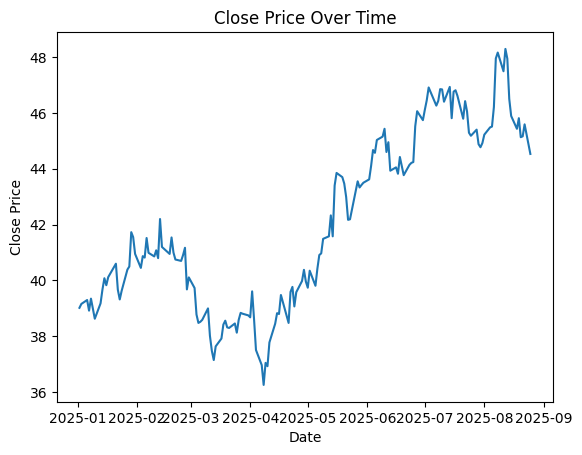

In [13]:
# Drawing Line Plots
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

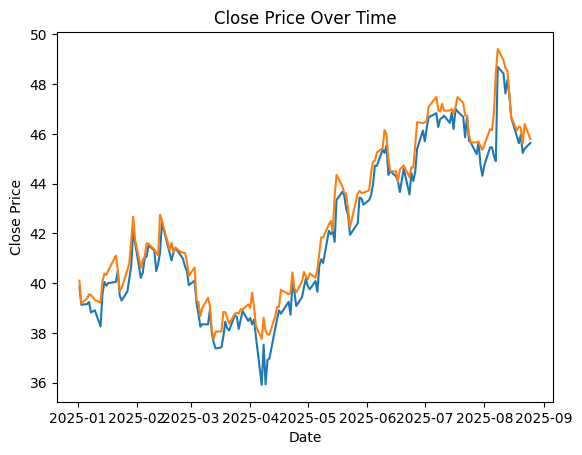

In [16]:
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['High'])
# plt.plot(df['Date'], df['Low'])
# plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

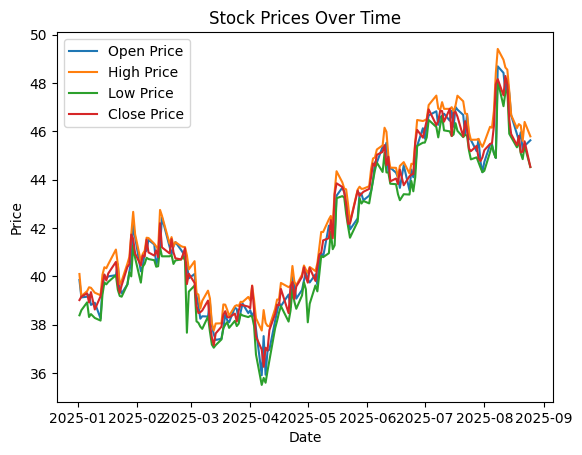

In [17]:
# Adding a Legend
plt.plot(df['Date'], df['Open'], label='Open Price')
plt.plot(df['Date'], df['High'], label='High Price')
plt.plot(df['Date'], df['Low'], label='Low Price')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

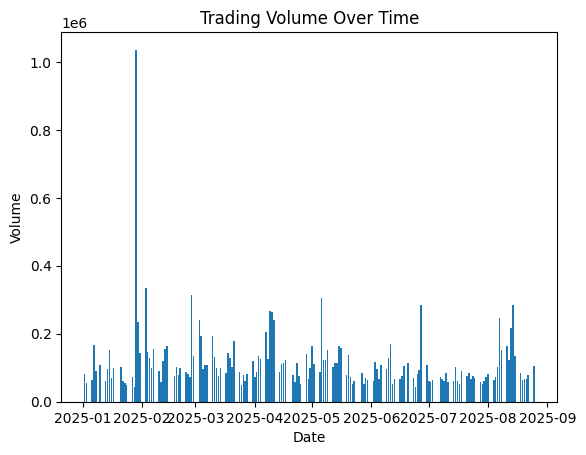

In [18]:
# Drawing Bar Plots
plt.bar(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()


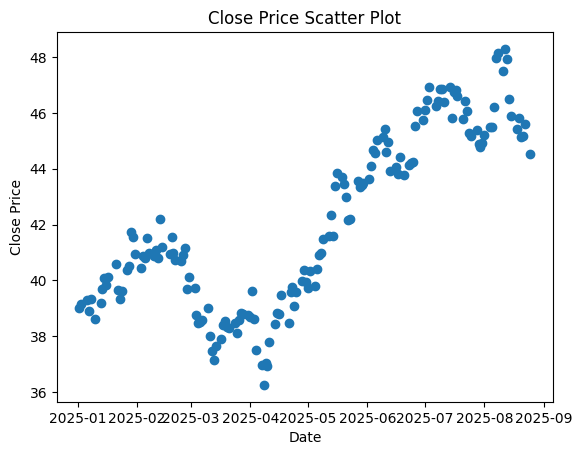

In [19]:
# scatter plots
plt.scatter(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Scatter Plot')
plt.show()

In [20]:
# date to month 
# # Import the calendar package 
import calendar
# Extract month from the Date column
df['Month'] = df['Date'].dt.month
# Convert month number to month name
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])
df.head()

,Date,Open,High,Low,Close,Volume,Month
0,2025-08-25,45.63,45.7931,44.52,44.53,105898,August
1,2025-08-22,45.40,46.3900,45.40,45.59,77570,August
2,2025-08-21,45.23,45.6050,44.85,45.16,66615,August
3,2025-08-20,45.96,46.2400,45.09,45.13,67058,August
4,2025-08-19,45.62,46.3000,45.57,45.81,65077,August


<Axes: xlabel='Month'>

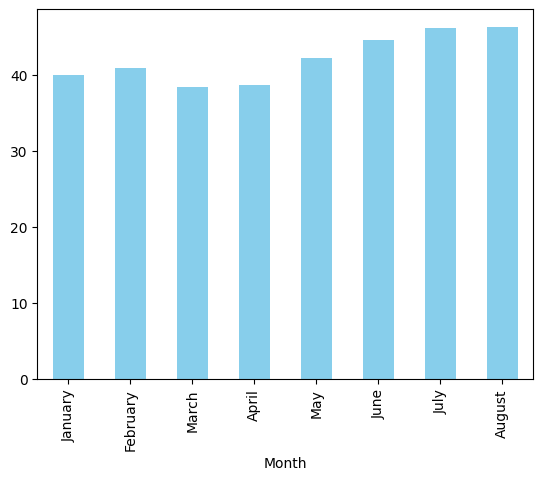

In [24]:
# bar plot of average close price by month
monthly_avg = df.groupby('Month')['Close'].mean().reindex(list(calendar.month_name)[1:9])
monthly_avg.plot(kind='bar', color='skyblue')

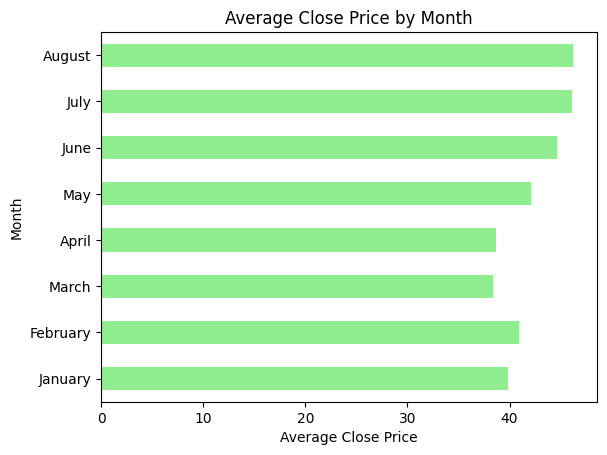

In [25]:
# horizontal bar plot
monthly_avg.plot(kind='barh', color='lightgreen')
plt.xlabel('Average Close Price')
plt.ylabel('Month')
plt.title('Average Close Price by Month')
plt.show()

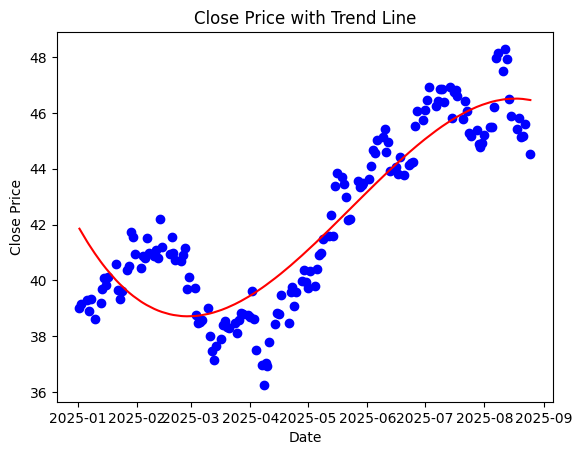

In [28]:
# Scatter Plots with a Trend Line
plt.scatter(df['Date'], df['Close'], label='Close Price', color='blue')
z = np.polyfit(df['Date'].map(datetime.toordinal), df['Close'], 3)
p = np.poly1d(z)
plt.plot(df['Date'], p(df['Date'].map(datetime.toordinal)), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Trend Line')
plt.show()


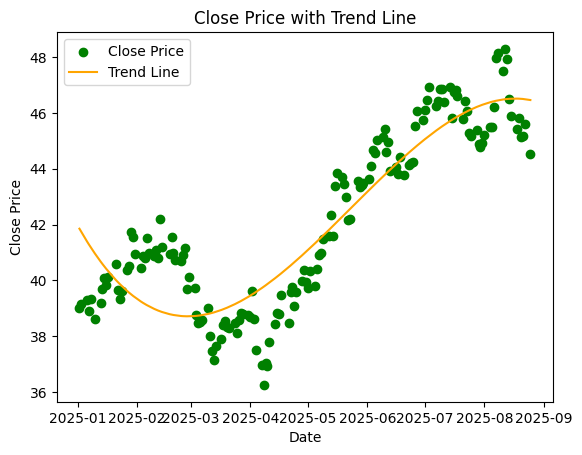

In [29]:
# Changing Colors Points
plt.scatter(df['Date'], df['Close'], label='Close Price', color='green')
z = np.polyfit(df['Date'].map(datetime.toordinal), df['Close'],
    3)
p = np.poly1d(z)
plt.plot(df['Date'], p(df['Date'].map(datetime.toordinal)), color='orange', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Trend Line')
plt.legend()
plt.show()